In [67]:
!pip install gym

In [68]:
import gym
import numpy as np

In [ ]:
#Initialize environmennt
env = gym.make('CartPole-v1')

In [75]:
# Hyperparameters
alpha = 0.1 #learning rate
gamma = 0.99 #disc rate
epsilon = 0.1
num_episodes = 1000
num_bins = (10, 10, 10, 10)  # Define number of bins for discretization

In [84]:
class SARSA:
    def __init__(self, env, alpha, gamma, epsilon, num_episodes, num_bins):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.num_episodes = num_episodes
        self.num_bins = num_bins
        self.Q = np.zeros(num_bins + (env.action_space.n,))
        self.episode_rewards = []  # List to store rewards for each episode during training

    def discretize_state(self, state):
        bounds = list(zip(self.env.observation_space.low, self.env.observation_space.high))
        discretized_state = tuple(int(np.digitize(s, bins)) for s, bins in zip(state, bounds))
        return discretized_state

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()  # Random action
        else:
            return np.argmax(self.Q[state])  # Greedy action

    def train(self):
        for episode in range(self.num_episodes):
            state = self.discretize_state(self.env.reset())
            action = self.select_action(state)
            done = False
            episode_reward = 0
            while not done:
                next_state, reward, done, _ = self.env.step(action)
                next_state = self.discretize_state(next_state)
                next_action = self.select_action(next_state)
                td_target = reward + self.gamma * self.Q[next_state][next_action]
                td_error = td_target - self.Q[state][action]
                self.Q[state][action] += self.alpha * td_error
                state, action = next_state, next_action
                episode_reward += reward
            self.episode_rewards.append(episode_reward)

    def test(self):
        state = self.discretize_state(self.env.reset())
        total_reward = 0
        done = False
        while not done:
            action = np.argmax(self.Q[state])
            state, reward, done, _ = self.env.step(action)
            state = self.discretize_state(state)
            total_reward += reward
        return total_reward


In [85]:
# Train SARSA agent
agent = SARSA(env, alpha, gamma, epsilon, num_episodes, num_bins)
agent.train()

# Test learned policy
total_reward = agent.test()
print("Total reward:", total_reward)

Total reward: 9.0


In [86]:
# Print performance metrics
episode_rewards = []  # List to store rewards for each episode during training
for _ in range(100):  # Test 100 episodes to evaluate average and maximum rewards
    episode_reward = agent.test()
    episode_rewards.append(episode_reward)

avg_reward = np.mean(episode_rewards)
max_reward = np.max(episode_rewards)
print(f"Average Total Reward: {avg_reward}")
print(f"Maximum Total Reward: {max_reward}")

Average Total Reward: 9.28
Maximum Total Reward: 11.0


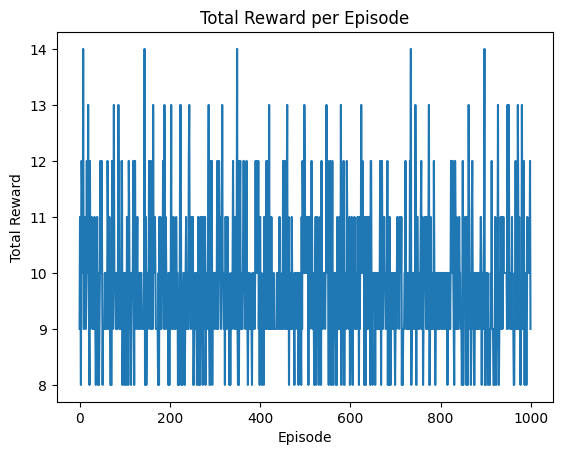

In [87]:
import matplotlib.pyplot as plt
# Plot episode rewards
plt.plot(agent.episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()